In [1]:
import multiprocessing.popen_spawn_posix
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
c = Client(cluster)
c

/scratch/cnt0024/ige2071/aalbert/conda/caledo/lib/python3.9/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45459 instead
  warnings.warn(


Client Scheduler: tcp://127.0.0.1:41246 Dashboard: http://127.0.0.1:45459/status,Cluster Workers: 8 Cores: 56 Memory: 270.19 GB


In [2]:
import xarray as xr

In [3]:
%time ds=xr.open_mfdataset('/store/CT1/hmg2840/lbrodeau/TROPICO12/TROPICO12_NST-TRPC12N00-S/*/*gridT-2D.nc4',parallel=True,concat_dim='time_counter',combine='nested')

CPU times: user 623 ms, sys: 202 ms, total: 825 ms
Wall time: 5.17 s


In [4]:
%time ds=xr.open_mfdataset('/store/CT1/hmg2840/lbrodeau/TROPICO12/TROPICO12_NST-TRPC12N00-S/*/*gridT-2D.nc4',parallel=True,concat_dim='time_counter',combine='nested',chunks={'x':1000,'y':500})

CPU times: user 527 ms, sys: 148 ms, total: 675 ms
Wall time: 1.5 s


In [5]:
ds

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, time_counter: 1340, x: 1775, y: 926)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(124,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2012-01-01T03:00:00 ....
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    mldr10_1              (time_counter, y, x) float32 dask.array<chunksize=(124, 500, 1000), meta=np.ndarray>
    rho_air               (time_counter, y, x) float32 dask.array<chunksize=(124, 500, 1000), meta=np.ndarray>
    sos                   (time_counter, y, x) float32 dask.array<chunksize=(124, 500, 1000), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(124, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(124, 2), meta=np.ndarray>
    tos                   (time_counter, y, x) float32 dask.array<chunksize=(124, 500, 1000), meta=np.ndarray>
    windsp                (time_counter, y, x) float32 dask.array<chunksize=(124, 500, 1000), meta=np.ndarray>
    zos                   (time_counter, y, x) float32 dask.array<chunksize=(124, 500, 1000), meta=np.ndarray>
Attributes:
    name:         /scratch/cnt0024/hmg2840/lbrodeau/NEMO/TROPICO12/TROPICO12_...
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.6
    timeStamp:    2021-Feb-02 14:29:06 GMT
    uuid:         92ff3e63-f353-4473-b815-adcc7ad76676
    history:      Tue Feb  2 21:52:37 2021: ncks -4 -L 7 --cnk_dmn x,1775 --c...
    NCO:          netCDF Operators version 4.7.9 (Homepage = http://nco.sf.ne...

CPU times: user 2.78 s, sys: 642 ms, total: 3.42 s
Wall time: 37.6 s


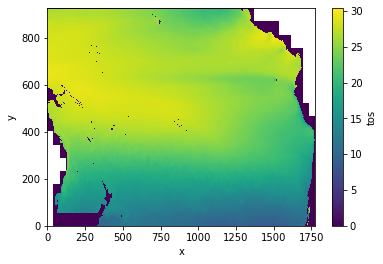

In [6]:
%time ds.tos.mean(axis=0).plot()

In [9]:
%time dsc=xr.open_mfdataset('/store/CT1/hmg2840/lbrodeau/TROPICO12/TROPICO12_NST-TRPC12N00-S/*/*gridT-2D.nc4',parallel=True,concat_dim='time_counter',combine='nested',chunks={'x':1500,'y':500})

CPU times: user 510 ms, sys: 113 ms, total: 623 ms
Wall time: 1.41 s


CPU times: user 2.08 s, sys: 530 ms, total: 2.61 s
Wall time: 31.3 s


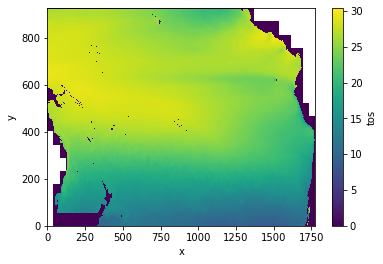

In [10]:
%time dsc.tos.mean(axis=0).plot()

In [7]:
%time dsb=xr.open_mfdataset('/store/CT1/hmg2840/lbrodeau/TROPICO12/TROPICO12_NST-TRPC12N00-S/*/*gridT-2D.nc4',parallel=True,concat_dim='time_counter',combine='nested',chunks={'x':500,'y':500})

CPU times: user 609 ms, sys: 113 ms, total: 722 ms
Wall time: 1.57 s


CPU times: user 3.71 s, sys: 724 ms, total: 4.43 s
Wall time: 52.8 s


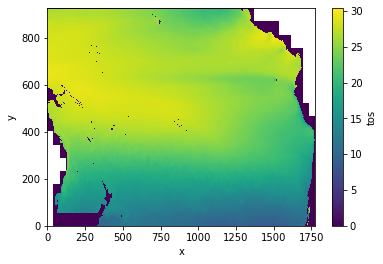

In [8]:
%time dsb.tos.mean(axis=0).plot()

In [11]:
%time ds2=xr.open_mfdataset('/store/CT1/hmg2840/lbrodeau/TROPICO12/TROPICO12_NST-TRPC12N00-S/*/NST/*gridT-2D.nc4',parallel=True,concat_dim='time_counter',combine='nested')

CPU times: user 396 ms, sys: 48.1 ms, total: 444 ms
Wall time: 1.11 s


In [13]:
ds2

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, time_counter: 8040, x: 788, y: 853)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(853, 788), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(853, 788), meta=np.ndarray>
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(744,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2012-01-01T00:30:00 ....
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    mldr10_1              (time_counter, y, x) float32 dask.array<chunksize=(744, 853, 788), meta=np.ndarray>
    rho_air               (time_counter, y, x) float32 dask.array<chunksize=(744, 853, 788), meta=np.ndarray>
    sos                   (time_counter, y, x) float32 dask.array<chunksize=(744, 853, 788), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(744, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(744, 2), meta=np.ndarray>
    tos                   (time_counter, y, x) float32 dask.array<chunksize=(744, 853, 788), meta=np.ndarray>
    windsp                (time_counter, y, x) float32 dask.array<chunksize=(744, 853, 788), meta=np.ndarray>
    zos                   (time_counter, y, x) float32 dask.array<chunksize=(744, 853, 788), meta=np.ndarray>
Attributes:
    name:         1_/scratch/cnt0024/hmg2840/lbrodeau/NEMO/TROPICO12/TROPICO1...
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.6
    timeStamp:    2021-Feb-02 14:27:00 GMT
    uuid:         c5ca1736-3d41-4435-8616-ae21dfa840a7
    history:      Tue Feb  2 22:14:55 2021: ncks -4 -L 7 --cnk_dmn x,788 --cn...
    NCO:          netCDF Operators version 4.7.9 (Homepage = http://nco.sf.ne...

In [14]:
%time ds2=xr.open_mfdataset('/store/CT1/hmg2840/lbrodeau/TROPICO12/TROPICO12_NST-TRPC12N00-S/*/NST/*gridT-2D.nc4',parallel=True,concat_dim='time_counter',combine='nested',chunks={'x':500,'y':500})

CPU times: user 440 ms, sys: 62.2 ms, total: 502 ms
Wall time: 1.12 s


In [15]:
ds2

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, time_counter: 8040, x: 788, y: 853)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(500, 500), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(500, 500), meta=np.ndarray>
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(744,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2012-01-01T00:30:00 ....
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    mldr10_1              (time_counter, y, x) float32 dask.array<chunksize=(744, 500, 500), meta=np.ndarray>
    rho_air               (time_counter, y, x) float32 dask.array<chunksize=(744, 500, 500), meta=np.ndarray>
    sos                   (time_counter, y, x) float32 dask.array<chunksize=(744, 500, 500), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(744, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(744, 2), meta=np.ndarray>
    tos                   (time_counter, y, x) float32 dask.array<chunksize=(744, 500, 500), meta=np.ndarray>
    windsp                (time_counter, y, x) float32 dask.array<chunksize=(744, 500, 500), meta=np.ndarray>
    zos                   (time_counter, y, x) float32 dask.array<chunksize=(744, 500, 500), meta=np.ndarray>
Attributes:
    name:         1_/scratch/cnt0024/hmg2840/lbrodeau/NEMO/TROPICO12/TROPICO1...
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.6
    timeStamp:    2021-Feb-02 14:27:00 GMT
    uuid:         c5ca1736-3d41-4435-8616-ae21dfa840a7
    history:      Tue Feb  2 22:14:55 2021: ncks -4 -L 7 --cnk_dmn x,788 --cn...
    NCO:          netCDF Operators version 4.7.9 (Homepage = http://nco.sf.ne...

CPU times: user 4.59 s, sys: 802 ms, total: 5.39 s
Wall time: 59.7 s


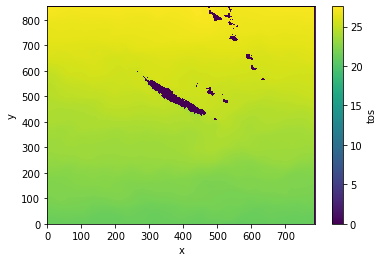

In [16]:
%time ds2.tos.mean(axis=0).plot()

In [17]:
%time ds2a=xr.open_mfdataset('/store/CT1/hmg2840/lbrodeau/TROPICO12/TROPICO12_NST-TRPC12N00-S/*/NST/*gridT-2D.nc4',parallel=True,concat_dim='time_counter',combine='nested',chunks={'x':250,'y':500})

CPU times: user 509 ms, sys: 71 ms, total: 581 ms
Wall time: 1.24 s


In [18]:
ds2a

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, time_counter: 8040, x: 788, y: 853)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(500, 250), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(500, 250), meta=np.ndarray>
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(744,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2012-01-01T00:30:00 ....
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    mldr10_1              (time_counter, y, x) float32 dask.array<chunksize=(744, 500, 250), meta=np.ndarray>
    rho_air               (time_counter, y, x) float32 dask.array<chunksize=(744, 500, 250), meta=np.ndarray>
    sos                   (time_counter, y, x) float32 dask.array<chunksize=(744, 500, 250), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(744, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(744, 2), meta=np.ndarray>
    tos                   (time_counter, y, x) float32 dask.array<chunksize=(744, 500, 250), meta=np.ndarray>
    windsp                (time_counter, y, x) float32 dask.array<chunksize=(744, 500, 250), meta=np.ndarray>
    zos                   (time_counter, y, x) float32 dask.array<chunksize=(744, 500, 250), meta=np.ndarray>
Attributes:
    name:         1_/scratch/cnt0024/hmg2840/lbrodeau/NEMO/TROPICO12/TROPICO1...
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.6
    timeStamp:    2021-Feb-02 14:27:00 GMT
    uuid:         c5ca1736-3d41-4435-8616-ae21dfa840a7
    history:      Tue Feb  2 22:14:55 2021: ncks -4 -L 7 --cnk_dmn x,788 --cn...
    NCO:          netCDF Operators version 4.7.9 (Homepage = http://nco.sf.ne...

CPU times: user 8.21 s, sys: 1.48 s, total: 9.69 s
Wall time: 1min 40s


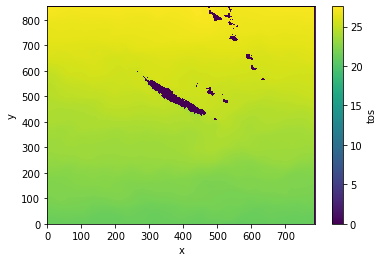

In [19]:
%time ds2a.tos.mean(axis=0).plot()

In [20]:
%time ds2a=xr.open_mfdataset('/store/CT1/hmg2840/lbrodeau/TROPICO12/TROPICO12_NST-TRPC12N00-S/*/NST/*gridT-2D.nc4',parallel=True,concat_dim='time_counter',combine='nested',chunks={'x':250,'y':250})

CPU times: user 633 ms, sys: 84 ms, total: 717 ms
Wall time: 1.46 s


CPU times: user 14.6 s, sys: 2.24 s, total: 16.8 s
Wall time: 2min 42s


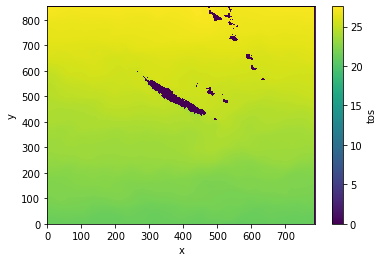

In [21]:
%time ds2a.tos.mean(axis=0).plot()